# Final Capstone Project

### This is my final submittion of the IBM Data Science Professional Certificate

#### My project is to search xxx to find the best place to open a Vietnamese xxx

In [1]:
#Firstly, add all the required libaries needed for the analysis
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!pip install beautifulsoup4
from bs4 import BeautifulSoup

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!pip install pandas==1.0.3

!pip install pandas==1.0.3

!pip install pandas==1.0.3

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


In [2]:
#Installing an earlier verison of Panda's that works!

!pip install pandas==1.0.3

## 1) Download the location data for the UK postcodes

There are 3114 unique postcodes in the UK. Currently there are 13 columns in the DF. I will drop some of the these columns that are not requires for this modelling

Postcodes provided by: https://www.doogal.co.uk/PostcodeDistricts.php

In [3]:
postcodes = pd.read_csv("Postcodes_UK.csv")
print(postcodes.shape)
postcodes.head()

(3114, 13)


Postcode  Latitude  Longitude   Easting  Northing Grid Reference  \
0      AB1   57.1269   -2.13644  391839.0  804005.0       NJ918040   
1      AB2   57.1713   -2.14152  391541.0  808948.0       NJ915089   
2      AB3   57.0876   -2.59624  363963.0  799780.0       NO639997   
3      AB4   57.5343   -2.12713  392487.0  849358.0       NJ924493   
4      AB5   57.4652   -2.64764  361248.0  841843.0       NJ612418   

                         Town/Area    Region  Postcodes  Active postcodes  \
0                         Aberdeen  Aberdeen     2655.0               0.0   
1                         Aberdeen  Aberdeen     3070.0               0.0   
2                         Aberdeen  Aberdeen     2168.0               0.0   
3  Fraserburgh, Peterhead, Macduff  Aberdeen     2956.0               0.0   
4        Buckie, Huntly, Inverurie  Aberdeen     3002.0               0.0   

   Population  Households                                   Nearby districts  
0         NaN         NaN  AB10, AB9, AB15, AB25, AB2, AB12, AB16, AB11, ...  
1         NaN         NaN  AB16, AB22, AB24, AB25, AB1, AB9, AB15, AB10, ...  
2         NaN         NaN  AB31, AB34, AB52, AB33, AB14, AB32, AB30, AB13...  
3         NaN         NaN  AB41, AB43, AB42, AB53, AB22, AB23, AB2, AB24,...  
4         NaN         NaN  AB54, AB52, AB45, AB53, AB33, AB44, AB55, AB51...

I will be removing Easting, Northing, Grid Refernece and Nearby districts from the DF

In [4]:
postcodes.drop(['Easting', 'Northing', 'Grid Reference', 'Nearby districts'], axis=1, inplace = True)
postcodes.rename(columns={"Town/Area": "Area"}, inplace = True)
print(postcodes.shape)
postcodes.head()

(3114, 9)


Postcode  Latitude  Longitude                             Area    Region  \
0      AB1   57.1269   -2.13644                         Aberdeen  Aberdeen   
1      AB2   57.1713   -2.14152                         Aberdeen  Aberdeen   
2      AB3   57.0876   -2.59624                         Aberdeen  Aberdeen   
3      AB4   57.5343   -2.12713  Fraserburgh, Peterhead, Macduff  Aberdeen   
4      AB5   57.4652   -2.64764        Buckie, Huntly, Inverurie  Aberdeen   

   Postcodes  Active postcodes  Population  Households  
0     2655.0               0.0         NaN         NaN  
1     3070.0               0.0         NaN         NaN  
2     2168.0               0.0         NaN         NaN  
3     2956.0               0.0         NaN         NaN  
4     3002.0               0.0         NaN         NaN

Removing blank cells for Latitude and Longitude

In [5]:
postcodes.dropna(subset=['Latitude'], inplace = True)
print(postcodes.shape)
postcodes.head()

(3096, 9)


Postcode  Latitude  Longitude                             Area    Region  \
0      AB1   57.1269   -2.13644                         Aberdeen  Aberdeen   
1      AB2   57.1713   -2.14152                         Aberdeen  Aberdeen   
2      AB3   57.0876   -2.59624                         Aberdeen  Aberdeen   
3      AB4   57.5343   -2.12713  Fraserburgh, Peterhead, Macduff  Aberdeen   
4      AB5   57.4652   -2.64764        Buckie, Huntly, Inverurie  Aberdeen   

   Postcodes  Active postcodes  Population  Households  
0     2655.0               0.0         NaN         NaN  
1     3070.0               0.0         NaN         NaN  
2     2168.0               0.0         NaN         NaN  
3     2956.0               0.0         NaN         NaN  
4     3002.0               0.0         NaN         NaN

Use geopy library to get the latitude and longitude values of the UK

In [6]:
address = 'United Kingdom'

geolocator = Nominatim(user_agent="united_kingdom")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the UK are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the UK are 54.7023545, -3.2765753.


Create a map of the UK with the regions superimposed on top

In [7]:
# create map of the UK using latitude and longitude values
map_UK = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for Latitude, Longitude, Region, Area in zip(postcodes['Latitude'], postcodes['Longitude'], postcodes['Region'], postcodes['Area']):
    label = '{}, {}'.format(Region, Area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_UK)  
    
map_UK

In [8]:
map_UK.save(outfile= "UK.html")

Initially, I would like to look at restaurant locations in and around Nottingham, but different cities can be chosen

In [9]:
local_data = postcodes[(postcodes['Region'] == 'Nottingham') | 
                       (postcodes['Region'] == 'Leicester') | 
                       (postcodes['Region'] == 'Charnwood') |
                       (postcodes['Region'] == 'Birmingham') |
                       (postcodes['Region'] == 'Derby')
                      ].reset_index(drop=True)
local_data

Postcode  Latitude  Longitude  \
0        B5   52.4722   -1.89682   
1        B6   52.5025   -1.88685   
2        B7   52.4938   -1.87437   
3        B8   52.4900   -1.84277   
4        B9   52.4781   -1.85284   
..      ...       ...        ...   
79      NG7   52.9584   -1.17838   
80      NG8   52.9637   -1.21464   
81     NG11   52.9000   -1.17425   
82     NG80   52.9360   -1.19194   
83     NG90   52.9266   -1.19278   

                                                 Area      Region  Postcodes  \
0                         Digbeth, Highgate, Lee Bank  Birmingham      878.0   
1                                               Aston  Birmingham      870.0   
2                                            Nechells  Birmingham      436.0   
3                   Washwood Heath, Ward End, Saltley  Birmingham      777.0   
4                                     Bordesley Green  Birmingham      770.0   
..                                                ...         ...        ...   
79  New Basford, Forest Fields, Hyson Green, Radfo...  Nottingham     1738.0   
80            Aspley, Wollaton, Whitemoor, Bilborough  Nottingham     1700.0   
81                        Clifton, Ruddington, Gotham  Nottingham     1044.0   
82                                           Experian  Nottingham       56.0   
83                                 Boots the Chemists  Nottingham       30.0   

    Active postcodes  Population  Households  
0              378.0     12156.0      5139.0  
1              424.0     19507.0      5886.0  
2              270.0      8554.0      3444.0  
3              579.0     42278.0     11987.0  
4              414.0     24915.0      7548.0  
..               ...         ...         ...  
79            1150.0     57680.0     20183.0  
80            1203.0     63920.0     25706.0  
81             844.0     37614.0     16154.0  
82              28.0         NaN         NaN  
83              19.0         NaN         NaN  

[84 rows x 9 columns]

In [10]:
address = 'Loughborough'

geolocator = Nominatim(user_agent="united_kingdom")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the East Midlands are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the East Midlands are 52.7723859, -1.2077985.


In [11]:
# create map of the UK using latitude and longitude values
map_local = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for Latitude, Longitude, Region, Area, Postcode in zip(local_data['Latitude'], local_data['Longitude'], local_data['Region'], local_data['Area'], local_data['Postcode']):
    label = '{}, {}'.format(Region, Area, Postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_local)  
    
map_local

In [12]:
map_local.save(outfile= "Local.html")

Get the credentials for FourSquare

In [13]:
CLIENT_ID = 'BH50HIWF5OEL21Z5X3HEI0FEZPNWXTM5FONWSAON1GDQO2C1' # your Foursquare ID
CLIENT_SECRET = 'P15LUDHOWEGL2RTGSMQLJZ2FKS2MFIVPXLBPWU2PLHBZM4FN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BH50HIWF5OEL21Z5X3HEI0FEZPNWXTM5FONWSAON1GDQO2C1
CLIENT_SECRET:P15LUDHOWEGL2RTGSMQLJZ2FKS2MFIVPXLBPWU2PLHBZM4FN


Make the FourSquare API object

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
local_venues = getNearbyVenues(names=local_data['Area'],
                                   latitudes=local_data['Latitude'],
                                   longitudes=local_data['Longitude'])

Digbeth, Highgate, Lee Bank
Aston
Nechells
Washwood Heath, Ward End, Saltley
Bordesley Green
Small Heath
Sparkhill, Tyseley
Balsall Heath, Sparkbrook, Highgate
Moseley, Billesley
Kings Heath, Yardley Wood, Brandwood, Druids Heath, Warstock
Edgbaston, Lee Bank
Edgbaston, Ladywood
Harborne
Winson Green, Hockley
Lozells, Newtown, Birchfield
Birchfield, Handsworth Wood Perry Barr
Handsworth
Kings Norton
Erdington, Short Heath
Erdington, Tyburn
Yardley
Sheldon, Yardley
Acocks Green
Hall Green
Selly Oak, Bournbrook, Selly Park, Weoley Castle, California
Bournville, Cotteridge, Stirchley
Northfield
Woodgate, Bartley Green, Quinton, California
Kitts Green, Stechford
Shard End, Buckland End
Castle Vale
Kings Norton
Perry Barr, Great Barr, Hamstead
Great Barr, Hamstead, Pheasey
Perry Barr, Kingstanding, Great Barr
Rednal, Rubery
Sutton Coldfield town centre, Maney, Wylde Green
Boldmere, New Oscott, Wylde Green
Four Oaks, Mere Green, Little Aston, Streetly
Sutton Trinity, Falcon Lodge, Rectory
Wa

In [16]:
print(local_venues.shape)
local_venues.head()

(795, 7)


Area  Area Latitude  Area Longitude  \
0  Digbeth, Highgate, Lee Bank        52.4722        -1.89682   
1  Digbeth, Highgate, Lee Bank        52.4722        -1.89682   
2  Digbeth, Highgate, Lee Bank        52.4722        -1.89682   
3  Digbeth, Highgate, Lee Bank        52.4722        -1.89682   
4  Digbeth, Highgate, Lee Bank        52.4722        -1.89682   

                   Venue  Venue Latitude  Venue Longitude       Venue Category  
0   Quarter Horse Coffee       52.471454        -1.899532          Coffee Shop  
1  Birmingham Hippodrome       52.474471        -1.897573              Theater  
2            The Diskery       52.472253        -1.899471          Record Shop  
3      Miyako Teppanyaki       52.474800        -1.896060  Japanese Restaurant  
4                   Eden       52.471721        -1.893867              Gay Bar

In [17]:
local_venues.groupby('Area').count()

Area Latitude  \
Area                                                                
Acocks Green                                                   11   
Allenton, Alvaston, Boulton, Osmaston, Shelton ...              4   
Allestree, Darley Abbey, Mackworth Estate, Kedl...              1   
Ashby-de-la-Zouch, Boundary, Calke, Smisby, Wil...             17   
Aspley, Wollaton, Whitemoor, Bilborough                         2   
...                                                           ...   
Sutton Coldfield town centre, Maney, Wylde Green               10   
Walmley                                                         1   
Wigston                                                         4   
Woodgate, Bartley Green, Quinton, California                    2   
Yardley                                                         6   

                                                    Area Longitude  Venue  \
Area                                                                        
Acocks Green                                                    11     11   
Allenton, Alvaston, Boulton, Osmaston, Shelton ...               4      4   
Allestree, Darley Abbey, Mackworth Estate, Kedl...               1      1   
Ashby-de-la-Zouch, Boundary, Calke, Smisby, Wil...              17     17   
Aspley, Wollaton, Whitemoor, Bilborough                          2      2   
...                                                            ...    ...   
Sutton Coldfield town centre, Maney, Wylde Green                10     10   
Walmley                                                          1      1   
Wigston                                                          4      4   
Woodgate, Bartley Green, Quinton, California                     2      2   
Yardley                                                          6      6   

                                                    Venue Latitude  \
Area                                                                 
Acocks Green                                                    11   
Allenton, Alvaston, Boulton, Osmaston, Shelton ...               4   
Allestree, Darley Abbey, Mackworth Estate, Kedl...               1   
Ashby-de-la-Zouch, Boundary, Calke, Smisby, Wil...              17   
Aspley, Wollaton, Whitemoor, Bilborough                          2   
...                                                            ...   
Sutton Coldfield town centre, Maney, Wylde Green                10   
Walmley                                                          1   
Wigston                                                          4   
Woodgate, Bartley Green, Quinton, California                     2   
Yardley                                                          6   

                                                    Venue Longitude  \
Area                                                                  
Acocks Green                                                     11   
Allenton, Alvaston, Boulton, Osmaston, Shelton ...                4   
Allestree, Darley Abbey, Mackworth Estate, Kedl...                1   
Ashby-de-la-Zouch, Boundary, Calke, Smisby, Wil...               17   
Aspley, Wollaton, Whitemoor, Bilborough                           2   
...                                                             ...   
Sutton Coldfield town centre, Maney, Wylde Green                 10   
Walmley                                                           1   
Wigston                                                           4   
Woodgate, Bartley Green, Quinton, California                      2   
Yardley                                                           6   

                                                    Venue Category  
Area                                                                
Acocks Green                                                    11  
Allenton, Alvaston, Boulton, Osmaston, Shelton ...               4  
Allestree, Darley Abbey, Mackworth Estate

In [18]:
print('There are {} uniques categories.'.format(len(local_venues['Venue Category'].unique())))

There are 159 uniques categories.


In [19]:
print(local_venues['Venue Category'].unique())

['Coffee Shop' 'Theater' 'Record Shop' 'Japanese Restaurant' 'Gay Bar'
 'Korean Restaurant' 'Grocery Store' 'Vietnamese Restaurant'
 'Cocktail Bar' 'Chinese Restaurant' 'Burger Joint'
 'Latin American Restaurant' 'Bookstore' 'Hotel' 'Pub' 'Pizza Place'
 'Restaurant' 'Indian Restaurant' 'Sports Bar' 'Music Venue' 'Auto Garage'
 'Bistro' 'Thai Restaurant' 'Farmers Market' 'Motorcycle Shop' 'Park'
 'Bar' 'Convenience Store' 'Gym / Fitness Center' 'Supermarket'
 'Sandwich Place' 'Café' 'Market' 'Middle Eastern Restaurant'
 'Fast Food Restaurant' 'Turkish Restaurant' 'Gas Station'
 'Italian Restaurant' 'Pakistani Restaurant' 'Electronics Store'
 'Furniture / Home Store' 'Pool' 'Golf Course' 'Photography Studio'
 'Cricket Ground' 'Gastropub' 'Botanical Garden' 'Asian Restaurant'
 'Tapas Restaurant' 'Reservoir' 'Casino' 'Indoor Play Area'
 'Deli / Bodega' 'Soccer Stadium' 'Soccer Field' 'Fried Chicken Joint'
 'Business Service' 'Gym' 'English Restaurant' 'History Museum' 'Plaza'
 'Bus Stop' '

Now I need to analyses each neighborhood

In [20]:
# one hot encoding
local_onehot = pd.get_dummies(local_venues[['Venue Category']], prefix="", prefix_sep="")

# add region column back to dataframe
local_onehot['Area'] = local_venues['Area'] 

# move neighborhood column to the first column
fixed_columns = [local_onehot.columns[-1]] + list(local_onehot.columns[:-1])
local_onehot = local_onehot[fixed_columns]

print(local_onehot.shape)
local_onehot.head()

(795, 160)


Area  ATM  American Restaurant  Aquarium  \
0  Digbeth, Highgate, Lee Bank    0                    0         0   
1  Digbeth, Highgate, Lee Bank    0                    0         0   
2  Digbeth, Highgate, Lee Bank    0                    0         0   
3  Digbeth, Highgate, Lee Bank    0                    0         0   
4  Digbeth, Highgate, Lee Bank    0                    0         0   

   Art Gallery  Asian Restaurant  Athletics & Sports  Auto Garage  BBQ Joint  \
0            0                 0                   0            0          0   
1            0                 0                   0            0          0   
2            0                 0                   0            0          0   
3            0                 0                   0            0          0   
4            0                 0                   0            0          0   

   Bakery  ...  Train Station  Tram Station  Turkish Restaurant  \
0       0  ...              0             0                   0   
1       0  ...              0             0                   0   
2       0  ...              0             0                   0   
3       0  ...              0             0                   0   
4       0  ...              0             0                   0   

   Video Game Store  Vietnamese Restaurant  Warehouse Store  Wine Bar  \
0                 0                      0                0         0   
1                 0                      0                0         0   
2                 0                      0                0         0   
3                 0                      0                0         0   
4                 0                      0                0         0   

   Wine Shop  Wings Joint  Women's Store  
0          0            0              0  
1          0            0              0  
2          0            0              0  
3          0            0              0  
4          0            0              0  

[5 rows x 160 columns]

In [21]:
local_grouped = local_onehot.groupby('Area').mean().reset_index()
local_grouped

Area  ATM  \
0                                        Acocks Green  0.0   
1   Allenton, Alvaston, Boulton, Osmaston, Shelton...  0.0   
2   Allestree, Darley Abbey, Mackworth Estate, Ked...  0.0   
3   Ashby-de-la-Zouch, Boundary, Calke, Smisby, Wi...  0.0   
4             Aspley, Wollaton, Whitemoor, Bilborough  0.0   
..                                                ...  ...   
61   Sutton Coldfield town centre, Maney, Wylde Green  0.0   
62                                            Walmley  0.0   
63                                            Wigston  0.0   
64       Woodgate, Bartley Green, Quinton, California  0.0   
65                                            Yardley  0.0   

    American Restaurant  Aquarium  Art Gallery  Asian Restaurant  \
0                   0.0       0.0          0.0               0.0   
1                   0.0       0.0          0.0               0.0   
2                   0.0       0.0          0.0               0.0   
3                   0.0       0.0          0.0               0.0   
4                   0.0       0.0          0.0               0.0   
..                  ...       ...          ...               ...   
61                  0.0       0.0          0.0               0.0   
62                  0.0       0.0          0.0               0.0   
63                  0.0       0.0          0.0               0.0   
64                  0.0       0.0          0.0               0.0   
65                  0.0       0.0          0.0               0.0   

    Athletics & Sports  Auto Garage  BBQ Joint    Bakery  ...  Train Station  \
0             0.000000          0.0        0.0  0.000000  ...            0.0   
1             0.000000          0.0        0.0  0.250000  ...            0.0   
2             0.000000          0.0        0.0  0.000000  ...            0.0   
3             0.058824          0.0        0.0  0.058824  ...            0.0   
4             0.000000          0.0        0.0  0.000000  ...            0.0   
..                 ...          ...        ...       ...  ...            ...   
61            0.000000          0.0        0.0  0.000000  ...            0.0   
62            0.000000          0.0        0.0  0.000000  ...            0.0   
63            0.000000          0.0        0.0  0.000000  ...            0.0   
64            0.000000          0.0        0.0  0.000000  ...            0.0   
65            0.000000          0.0        0.0  0.000000  ...            0.0   

    Tram Station  Turkish Restaurant  Video Game Store  Vietnamese Restaurant  \
0            0.0                 0.0               0.0                    0.0   
1            0.0                 0.0               0.0                    0.0   
2            0.0                 0.0               0.0                    0.0   
3            0.0                 0.0               0.0                    0.0   
4            0.0                 0.0               0.0                    0.0   
..           ...                 ...               ...                    ...   
61           0.0                 0.0               0.0                    0.0   
62           0.0                 0.0               0.0                    0.0   
63           0.0                 0.0               0.0                    0.0   
64           0.0                 0.0               0.0                    0.0   
65           0.0                 0.0               0.0                    0.0   

    Warehouse Store  Wine Bar  Wine Shop  Wings Joint  Women's Store  
0          0.090909       0.0        0.0          0.0            0.0  
1          0.000000       0.0        0.0          0.0            0.0  
2          0.000000       0.0        0.0          0.0            0.0  
3          0.000000       0.0        0.0          0.0            0.0  
4          0.000000       0.0        0.0          0.0            0.0  
..              ...       ...        ...          ...            ...  
61         0.100000       0.0        0.0          0.0   

In [22]:
num_top_venues = 10

for area in local_grouped['Area']:
    print("----"+area+"----")
    temp = local_grouped[local_grouped['Area'] == area].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acocks Green----
                    venue  freq
0             Supermarket  0.27
1                     Pub  0.09
2         Warehouse Store  0.09
3          Discount Store  0.09
4           Bowling Alley  0.09
5             Coffee Shop  0.09
6          Sandwich Place  0.09
7  Furniture / Home Store  0.09
8           Grocery Store  0.09
9                Pet Café  0.00


----Allenton, Alvaston, Boulton, Osmaston, Shelton Lock, Sinfin, Wilmorton, Stenson Fields----
                    venue  freq
0  Furniture / Home Store  0.25
1          Sandwich Place  0.25
2                  Bakery  0.25
3           Grocery Store  0.25
4                Pet Café  0.00
5            Noodle House  0.00
6                  Office  0.00
7            Optical Shop  0.00
8    Outdoor Supply Store  0.00
9    Pakistani Restaurant  0.00


----Allestree, Darley Abbey, Mackworth Estate, Kedleston, Mackworth, Quarndon----
                          venue  freq
0  Theme Park Ride / Attraction   1.0
1                 

In [23]:
len(local_grouped[local_grouped["Vietnamese Restaurant"] > 0])

2

In [24]:
local_vnese = local_grouped[["Area","Vietnamese Restaurant"]]
local_vnese.head()

Area  Vietnamese Restaurant
0                                       Acocks Green                    0.0
1  Allenton, Alvaston, Boulton, Osmaston, Shelton...                    0.0
2  Allestree, Darley Abbey, Mackworth Estate, Ked...                    0.0
3  Ashby-de-la-Zouch, Boundary, Calke, Smisby, Wi...                    0.0
4            Aspley, Wollaton, Whitemoor, Bilborough                    0.0

# 2) Time to Make the Clusters

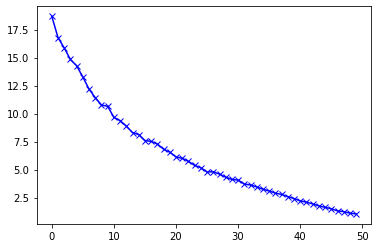

In [25]:
#loop k to find best k
import matplotlib.pyplot as plt

kclusters = range(1,51)
local_grouped_clustering = local_grouped.drop('Area', 1)
scores = []

for i in kclusters:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(local_grouped_clustering)
    scores.append(kmeans.inertia_)

plt.plot(scores,'bx-')    

In [26]:
# set number of clusters given the elbow method
kclusters = 22

#local_grouped_clustering = local_grouped.drop('Area', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(local_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([11, 11,  6, 16, 19,  0, 16,  4, 17, 16], dtype=int32)

In [27]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each area
local_merged = local_vnese.copy()

# add clustering labels
local_merged["Cluster Labels"] = kmeans.labels_
local_merged.head()

Area  Vietnamese Restaurant  \
0                                       Acocks Green                    0.0   
1  Allenton, Alvaston, Boulton, Osmaston, Shelton...                    0.0   
2  Allestree, Darley Abbey, Mackworth Estate, Ked...                    0.0   
3  Ashby-de-la-Zouch, Boundary, Calke, Smisby, Wi...                    0.0   
4            Aspley, Wollaton, Whitemoor, Bilborough                    0.0   

   Cluster Labels  
0              11  
1              11  
2               6  
3              16  
4              19

In [28]:
local_merged = local_merged.join(local_venues.set_index("Area"), on="Area")

print(local_merged.shape)
local_merged.head()

(795, 9)


Area  Vietnamese Restaurant  Cluster Labels  Area Latitude  \
0  Acocks Green                    0.0              11        52.4458   
0  Acocks Green                    0.0              11        52.4458   
0  Acocks Green                    0.0              11        52.4458   
0  Acocks Green                    0.0              11        52.4458   
0  Acocks Green                    0.0              11        52.4458   

   Area Longitude         Venue  Venue Latitude  Venue Longitude  \
0        -1.82377  Costa Coffee       52.446411        -1.822441   
0        -1.82377         wilko       52.446645        -1.823626   
0        -1.82377   Sainsbury's       52.445749        -1.820319   
0        -1.82377        Subway       52.446418        -1.823159   
0        -1.82377          Aldi       52.444804        -1.816914   

           Venue Category  
0             Coffee Shop  
0  Furniture / Home Store  
0             Supermarket  
0          Sandwich Place  
0             Supermarket

In [29]:
local_merged.sort_values(["Cluster Labels"], inplace=True)
local_merged

Area  Vietnamese Restaurant  \
5                                               Aston                    0.0   
15  Chaddesden, Oakwood, Spondon, Breadsall, Horsl...                    0.0   
15  Chaddesden, Oakwood, Spondon, Breadsall, Horsl...                    0.0   
15  Chaddesden, Oakwood, Spondon, Breadsall, Horsl...                    0.0   
15  Chaddesden, Oakwood, Spondon, Breadsall, Horsl...                    0.0   
..                                                ...                    ...   
4             Aspley, Wollaton, Whitemoor, Bilborough                    0.0   
54  Scraptoft, Anstey, Billesdon, Gaddesby, Hungar...                    0.0   
56                            Shard End, Buckland End                    0.0   
56                            Shard End, Buckland End                    0.0   
56                            Shard End, Buckland End                    0.0   

    Cluster Labels  Area Latitude  Area Longitude  \
5                0        52.5025        -1.88685   
15               0        52.9325        -1.43523   
15               0        52.9325        -1.43523   
15               0        52.9325        -1.43523   
15               0        52.9325        -1.43523   
..             ...            ...             ...   
4               19        52.9637        -1.21464   
54              20        52.6853        -1.07073   
56              21        52.4957        -1.78168   
56              21        52.4957        -1.78168   
56              21        52.4957        -1.78168   

                                  Venue  Venue Latitude  Venue Longitude  \
5                        ATS Euromaster       52.500975        -1.880585   
15           David Preston Preservation       52.931165        -1.440419   
15                  Chaddesden Fish Bar       52.934879        -1.438868   
15          National Tyres and Autocare       52.929510        -1.434220   
15                      Chaddesden Park       52.935188        -1.437416   
..                                  ...             ...              ...   
4           Harvey Haddon Sports Centre       52.966625        -1.218392   
54                         Reflex Glass       52.682457        -1.066114   
56                      Seaway Fish Bar       52.497298        -1.784009   
56  Well Shard End - Shard End Crescent       52.495442        -1.777698   
56                       PC Repair Guru       52.496695        -1.785879   

                Venue Category  
5                  Auto Garage  
15  Construction & Landscaping  
15          Seafood Restaurant  
15                 Auto Garage  
15                        Park  
..                         ...  
4         Gym / Fitness Center  
54  Construction & Landscaping  
56           Fish & Chips Shop  
56                    Pharmacy  
56                 IT Services  

[795 rows x 9 columns]

In [30]:
address = 'Loughborough'

geolocator = Nominatim(user_agent="united_kingdom")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the East Midlands are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the East Midlands are 52.7723859, -1.2077985.


In [31]:
# create map of the UK using latitude and longitude values
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for Latitude, Longitude, Area, Cluster in zip(local_merged['Area Latitude'], local_merged['Area Longitude'], local_merged['Area'], local_merged['Cluster Labels']):
    label = folium.Popup(str(Area) + ' Cluster ' + str(Cluster), parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color=rainbow[Cluster-1],
        fill=True,
        fill_color=rainbow[Cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters 

In [32]:
map_clusters.save('map_clusters.html')

Investigate the clusters

In [33]:
locations_w_vnese = pd.DataFrame(data = local_merged.loc[local_merged['Vietnamese Restaurant'] > 0])
locations_w_vnese

Area  Vietnamese Restaurant  Cluster Labels  Area Latitude  \
37  Leicester               0.004184              16        52.6314   
37  Leicester               0.004184              16        52.6314   
37  Leicester               0.004184              16        52.6314   
37  Leicester               0.004184              16        52.6314   
37  Leicester               0.004184              16        52.6314   
..        ...                    ...             ...            ...   
37  Leicester               0.004184              16        52.6335   
37  Leicester               0.004184              16        52.6335   
37  Leicester               0.004184              16        52.6335   
37  Leicester               0.004184              16        52.6335   
37  Leicester               0.004184              16        52.6312   

    Area Longitude                          Venue  Venue Latitude  \
37        -1.13201             The Little Theatre       52.631957   
37        -1.13201                   Exchange Bar       52.635079   
37        -1.13201               Grounded Kitchen       52.631635   
37        -1.13201  Revolution Bar and Restaurant       52.631021   
37        -1.13201                         Creams       52.634321   
..             ...                            ...             ...   
37        -1.13210                      Poundland       52.634975   
37        -1.13210                 The Distillery       52.632596   
37        -1.13210                The Parcel Yard       52.631603   
37        -1.13210                Marks & Spencer       52.635523   
37        -1.12914                    Las Iguanas       52.633186   

    Venue Longitude             Venue Category  
37        -1.129094                    Theater  
37        -1.127768                        Pub  
37        -1.132351          Korean Restaurant  
37        -1.131442                        Bar  
37        -1.131270               Dessert Shop  
..              ...                        ...  
37        -1.132253             Discount Store  
37        -1.133456                        Pub  
37        -1.125646                        Bar  
37        -1.132331           Department Store  
37        -1.130839  Latin American Restaurant  

[279 rows x 9 columns]

In [34]:
locations_w_vnese_1 = pd.DataFrame(data = locations_w_vnese.loc[locations_w_vnese['Venue Category'] == 'Vietnamese Restaurant'])
locations_w_vnese_1

Area  Vietnamese Restaurant  Cluster Labels  \
20  Digbeth, Highgate, Lee Bank               0.025000              16   
37                    Leicester               0.004184              16   

    Area Latitude  Area Longitude      Venue  Venue Latitude  Venue Longitude  \
20        52.4722        -1.89682  Cafe Soya       52.475067        -1.895810   
37        52.6335        -1.13210        Pho       52.635709        -1.137617   

           Venue Category  
20  Vietnamese Restaurant  
37  Vietnamese Restaurant

In [35]:
local_merged.loc[local_merged['Cluster Labels'] == 16]

Area  Vietnamese Restaurant  Cluster Labels  Area Latitude  \
19  Derby city centre               0.000000              16        52.9189   
18              Derby               0.000000              16        52.9132   
18              Derby               0.000000              16        52.9132   
18              Derby               0.000000              16        52.9132   
18              Derby               0.000000              16        52.9132   
..                ...                    ...             ...            ...   
37          Leicester               0.004184              16        52.6335   
37          Leicester               0.004184              16        52.6335   
37          Leicester               0.004184              16        52.6335   
37          Leicester               0.004184              16        52.6335   
37          Leicester               0.004184              16        52.6312   

    Area Longitude               Venue  Venue Latitude  Venue Longitude  \
19        -1.47271      The Music Shed       52.917340        -1.467417   
18        -1.44088              Subway       52.915922        -1.446210   
18        -1.44088  Pride Park Stadium       52.915164        -1.447397   
18        -1.44088    DW Fitness First       52.916052        -1.445474   
18        -1.44088   Frankie & Benny's       52.916100        -1.445881   
..             ...                 ...             ...              ...   
37        -1.13210           Poundland       52.634975        -1.132253   
37        -1.13210      The Distillery       52.632596        -1.133456   
37        -1.13210     The Parcel Yard       52.631603        -1.125646   
37        -1.13210     Marks & Spencer       52.635523        -1.132331   
37        -1.12914         Las Iguanas       52.633186        -1.130839   

               Venue Category  
19                Music Store  
18             Sandwich Place  
18             Soccer Stadium  
18       Gym / Fitness Center  
18        American Restaurant  
..                        ...  
37             Discount Store  
37                        Pub  
37                        Bar  
37           Department Store  
37  Latin American Restaurant  

[592 rows x 9 columns]